# Tech Challenge 1

## **Med Cost**

**Case:** Prever os custos médicos inviduais sobrados pelo seguro de vida.

Será usado um modelo de **Regressão Linear Múltipla**.

### Por que **Regressão Linear Múltipla**?

O valor para ser **previsto** `(variável dependente | target | y)` é o **Custo Médico individual cobrado pelo Seguro de Saúde**.

Para prever esse custo, **algumas** variáveis são necessárias. E quando se necessita de **mais de uma** variável para realizar a previsão, o cenário é de **Regressão Linear `Múltipla`**

Nesse caso, serão utilizados vários **X** `(variáveis independentes - variáveis características)` para prever um único **y** `(variável dependente - target)`



## **Exploração dos dados**

- Carregamento da base de dados e exploração das características.
- Análises Estatísticas descritivas e visualização de distruibuições relevantes.

In [68]:
import pandas as pd
import numpy as np

In [69]:
dataset = {
    'idade': [56, 46, 32],
    'gênero': ['feminino', 'masculino', 'masculino'],
    'imc': [29.774373714007336, 25.857394655216346, 23.014839993647488],
    'filhos': [2, 1, 0],
    'fumante': ['sim', 'não', 'não'],
    'região': ['sudoeste', 'nordeste', 'sudoeste'],
    'encargos': [31109.889763423336, 26650.702646642694, 21459.03799039332]
}

dataset

{'idade': [56, 46, 32],
 'gênero': ['feminino', 'masculino', 'masculino'],
 'imc': [29.774373714007336, 25.857394655216346, 23.014839993647488],
 'filhos': [2, 1, 0],
 'fumante': ['sim', 'não', 'não'],
 'região': ['sudoeste', 'nordeste', 'sudoeste'],
 'encargos': [31109.889763423336, 26650.702646642694, 21459.03799039332]}

In [70]:
# Criando um DataFrame
df = pd.DataFrame(dataset)

# Exibindo o DataFrame
df

,idade,gênero,imc,filhos,fumante,região,encargos
0,56,feminino,29.774374,2,sim,sudoeste,31109.889763
1,46,masculino,25.857395,1,não,nordeste,26650.702647
2,32,masculino,23.014840,0,não,sudoeste,21459.037990




---


Analisar linhas X colunas

In [71]:
df.shape

(3, 7)



---


Analisar dimensão da base de dados (Volume de Dados): quantidade de dados, tipos de dados das colunas. Posso analisar como tratar esses dados na modelagem, se existem valores nulos, o que fazer na base antes de criar o modelo preditivo.

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     3 non-null      int64  
 1   gênero    3 non-null      object 
 2   imc       3 non-null      float64
 3   filhos    3 non-null      int64  
 4   fumante   3 non-null      object 
 5   região    3 non-null      object 
 6   encargos  3 non-null      float64
dtypes: float64(2), int64(2), object(3)
memory usage: 296.0+ bytes




---


Analisando variáveis de Texto (object) para ver quantas categorias existem dentro de cada variável.

In [73]:
#set(df["gênero"])
df["gênero"].value_counts()

gênero
masculino    2
feminino     1
Name: count, dtype: int64

In [74]:
#set(df["fumante"])
df["fumante"].value_counts()

fumante
não    2
sim    1
Name: count, dtype: int64

In [75]:
#set(df["região"])
df["região"].value_counts()

região
sudoeste    2
nordeste    1
Name: count, dtype: int64



---

Analisar dados de tipo numérico com função describe() - Função Pandas.

In [76]:
df.describe()

,idade,imc,filhos,encargos
count,3.000000,3.000000,3.0,3.000000
mean,44.666667,26.215536,1.0,26406.543467
std,12.055428,3.393969,1.0,4830.056445
min,32.000000,23.014840,0.0,21459.037990
25%,39.000000,24.436117,0.5,24054.870319
50%,46.000000,25.857395,1.0,26650.702647
75%,51.000000,27.815884,1.5,28880.296205
max,56.000000,29.774374,2.0,31109.889763




---

Outro modo de analisar dados numéricos, é plotando gráficos de histogramas para analisar a distribuição desses dados. Com isso é possível analisar se os dados são simétricos ou assimétricos.

Nesse caso é possível ver que existe uma simetria.

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

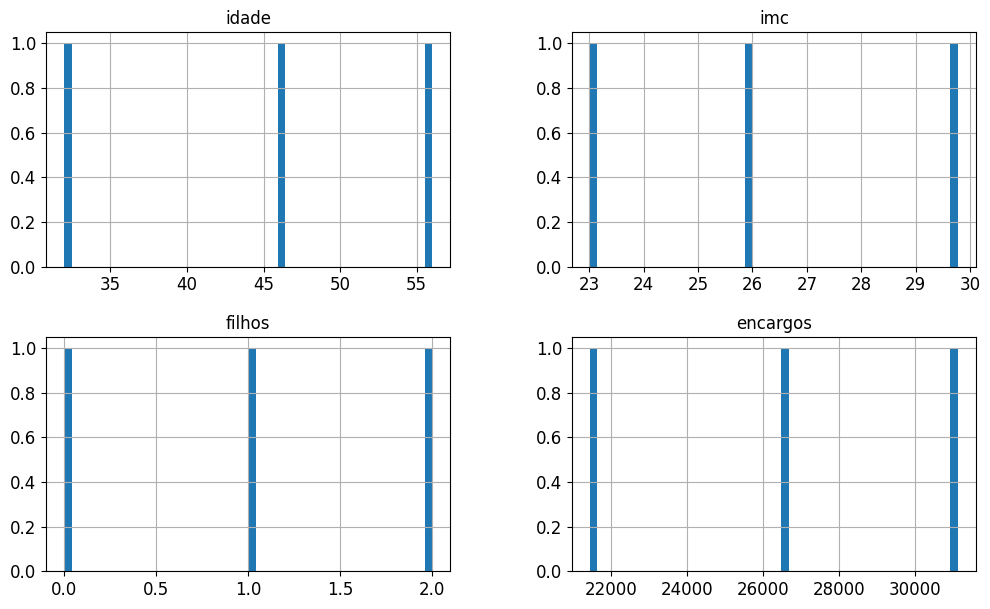

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,7))

## **Pré-processamento dos dados**
- Limpeza dos dados, tratamento de valores ausentes (se necessário).
- Conversão de variáveis categóricas em formatos adequados para a modelagem.

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit

In [58]:
from sklearn.model_selection import ShuffleSplit

In [ ]:
medcost = strat_train_set.drop("encargos", axis=1)
medcost_labels = strat_train_set["encargos"].copy()

### Transformando Variáveis Categóricas em valores numéricos




---

O OrdinalEncoder é uma classe da biblioteca scikit-learn, usada para transformar variáveis categóricas ordinais em valores numéricos. Variáveis ordinais são aquelas que têm uma ordem ou hierarquia específica, mas as distâncias entre os valores não são necessariamente significativas.

In [64]:
try:
    from sklearn.preprocessing import OrdinalEncoder
except ImportError:
    from sklearn.preprocessing import future_encoders
    from future_encoders import OrdinalEncoder # Scikit-Learn < 0.20

In [61]:
# Pegando coluna 'gênero' e colocando em 'medcost_gen'
medcost_gen = df['gênero']
medcost_gen

0     feminino
1    masculino
2    masculino
Name: gênero, dtype: object

In [62]:
# Pegando coluna 'fumante' e colocando em 'medcost_fum'
medcost_fum = df['fumante']
medcost_fum

0    sim
1    não
2    não
Name: fumante, dtype: object

In [63]:
# Pegando coluna 'região' e colocando em 'medcost_reg'
medcost_reg = df['região']
medcost_reg

0    sudoeste
1    nordeste
2    sudoeste
Name: região, dtype: object

In [79]:
import pandas as pd

# Supondo que df seja o seu DataFrame e que ele contém as variáveis categóricas 'gênero', 'fumante' e 'região'
df_encoded = pd.get_dummies(df, columns=['gênero', 'fumante', 'região'], drop_first=True)
df_encoded


,idade,imc,filhos,encargos,gênero_masculino,fumante_sim,região_sudoeste
0,56,29.774374,2,31109.889763,False,True,True
1,46,25.857395,1,26650.702647,True,False,False
2,32,23.014840,0,21459.037990,True,False,True


## Separando as base em Treino e Teste

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state = 7)

Aqui eu ainda não estou definindo nengum X e y. Somente a divisão da base entre Treino e Teste.


---



In [46]:
print(len(df_train), "Treinamento +", len(df_test), "Teste")

2 Treinamento + 1 Teste


Como o CSV só tem 3 linhas, 2 ficaram para Treinamento e 1 para Teste.


---

